<a href="https://colab.research.google.com/github/NickOLeeney/data-science-projects/blob/main/Lending_ClubLoanDataProject_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Loan Data Project

## Introduction 

### Data Source

For this project I will be using a set based on the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), us it possible to build a model that can predict wether or nor a borrower will pay back its loan? This way in the future when the company gets a new potential customer it can assess whether or not they are likely to pay back the loan. 

The "loan_status" column contains the label.

### Data Overview
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---


## Getting the data

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [367]:
df = pd.read_csv('lending_club_loan_two.csv')

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis

In [369]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

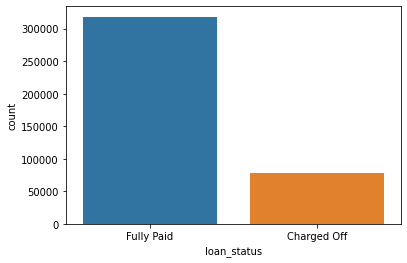

In [370]:
# Label countplot
sns.countplot(data = df, x='loan_status')

Creating an histogram of the loan_amnt column.




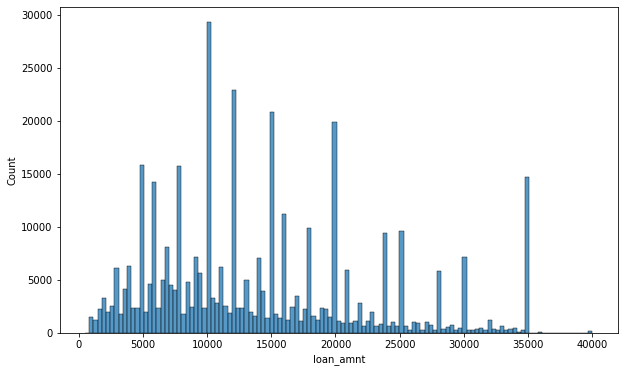

In [371]:
plt.figure(figsize=(10,6))
sns.histplot(data = df,x='loan_amnt')

Exploring correlation between the continuous feature variables. 

In [372]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


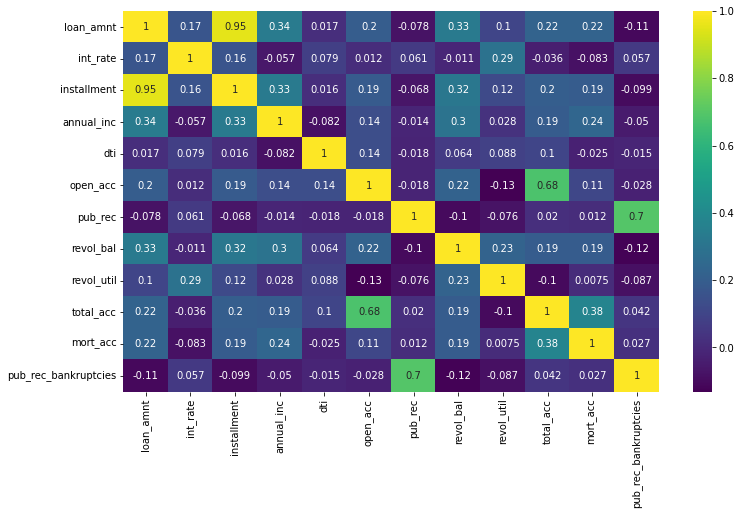

In [373]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)

There is an almost perfect correlation with the "installment" feature and "loan_amnt".

Text(0, 0.5, 'loan_amnt')

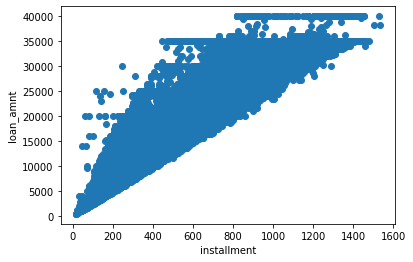

In [374]:
plt.scatter(x=df['installment'], y=df['loan_amnt'])
plt.xlabel('installment')
plt.ylabel('loan_amnt')

Creating a boxplot showing the relationship between the loan_status and the Loan Amount.

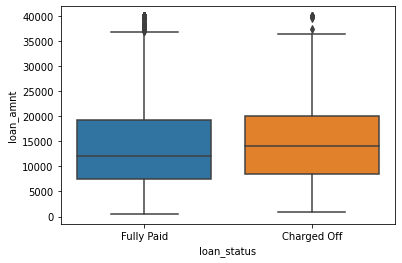

In [375]:
sns.boxplot(data = df, x='loan_status', y='loan_amnt')

Calculating the summary statistics for the loan amount, grouped by the loan_status.

In [376]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

In [377]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [378]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

Creating a countplot per grade. Set the hue to the loan_status label.

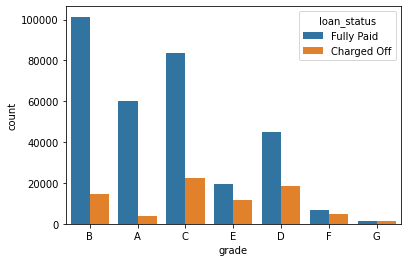

In [379]:
sns.countplot(data = df, x ='grade', hue = 'loan_status')

Displaying a count plot per subgrade

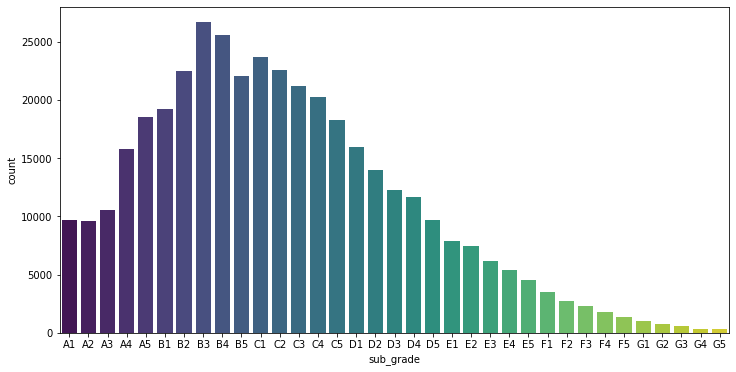

In [380]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x=pd.Series(df['sub_grade']).sort_values(), palette = 'viridis')

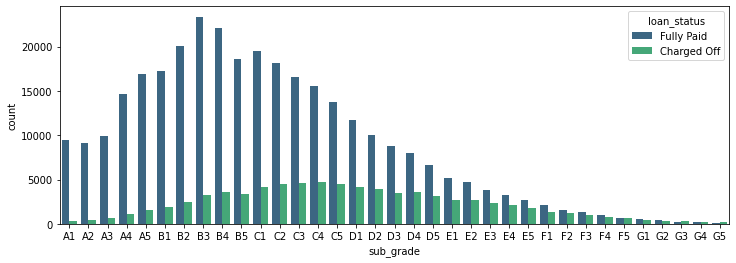

In [381]:
plt.figure(figsize=(12,4))
sns.countplot(data = df, x=pd.Series(df['sub_grade']).sort_values(), palette = 'viridis', hue = 'loan_status')

It looks like F and G subgrades don't get paid back that often. So I'm isolating those and recreate the countplot just for those subgrades.

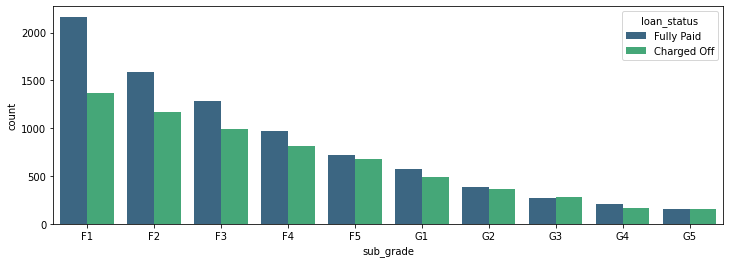

In [382]:
plt.figure(figsize=(12,4))
sns.countplot(data = df, x=pd.Series(df[(df['grade']=='F') | (df['grade']=='G')]['sub_grade']).sort_values(), palette = 'viridis', hue = 'loan_status')

Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [383]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 0 if x == 'Charged Off' else 1)

In [384]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column.

In [385]:
df.corr()['loan_repaid']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

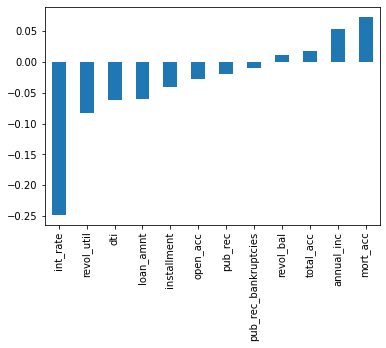

In [386]:
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

## Data PreProcessing

Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.



In [387]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


### Missing Data

Let's explore this missing data columns and decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.

In [388]:
len(df)

396030

Creating a Series that displays the total count of missing values per column.

In [389]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [390]:
# percentage of null values in columns
df.isnull().sum().apply(lambda x : x/len(df)*100)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Now I'm going to see how to handle these missing data: emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies.  

#### Missing data: *emp_title column*

Unique employment job titles:

In [391]:
len(df['emp_title'].unique())

173106

In [392]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [393]:
df.drop('emp_title', axis = 1, inplace = True)

#### Missing data: *emp_length column*

In [394]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [395]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

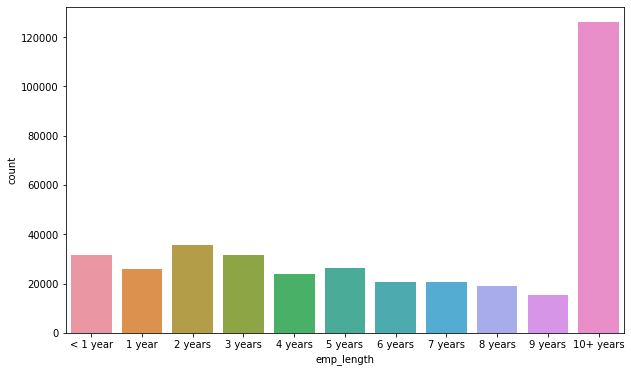

In [396]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = df['emp_length'],order = emp_length_order)

Plotting out the countplot with a hue separating Fully Paid vs Charged Off

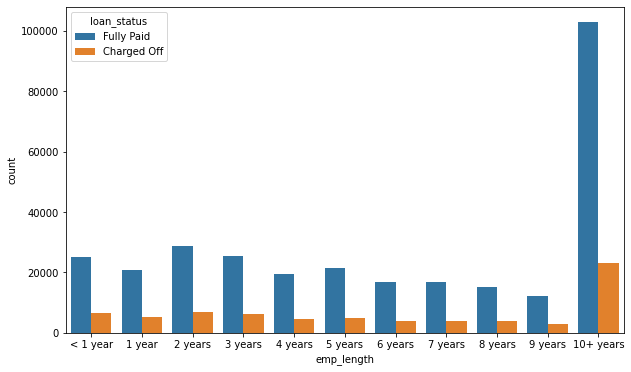

In [397]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = df['emp_length'], hue = 'loan_status', order = emp_length_order)

This still doesn't really inform if there is a strong relationship between employment length and being charged off, what I want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.

In [398]:
paid = df[df['loan_repaid'] == 1]['emp_length'].value_counts()
not_paid = df[df['loan_repaid'] == 0]['emp_length'].value_counts()
perc_array = not_paid[emp_length_order]/(paid[emp_length_order])

Text(0.5, 1.0, 'Percentage of Charged Off loans respect to years of employment')

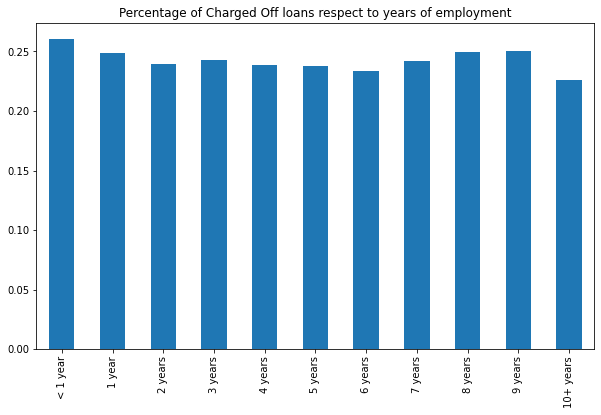

In [399]:
plt.figure(figsize = (10,6))
perc_array[emp_length_order].plot(kind = 'bar')
plt.title('Percentage of Charged Off loans respect to years of employment')

Charge off rates are extremely similar across all employment lengths. Let's drop the emp_length column.

In [400]:
df.drop('emp_length', axis=1, inplace=True)

#### Missing data: *title column*

Reviewing the title column vs the purpose column. It seems that these are repeated information

In [401]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [402]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

The title column is simply a string subcategory/description of the purpose column, so I'm dropping the title column.

In [403]:
df.drop('title', axis = 1 , inplace = True)

#### Missing data: *mort_acc column*

In [404]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [405]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

Trying to find out correlations for 'mort_acc' column, to see if is it possible to predict its null values

In [406]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach grouping the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [407]:
mort_acc_imputer = df.groupby('total_acc').mean()['mort_acc']

In [408]:
mort_acc_imputer

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [409]:
# filling 'mort_acc' nan values
df['mort_acc'].fillna(df.apply(lambda x: mort_acc_imputer[x.total_acc], axis=1), inplace = True) 

#### Missing data: *revol_util* and *pub_rec_bankruptcies columns*

In [410]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [411]:
# percentage of null values in columns
df.isnull().sum().apply(lambda x : x/len(df)*100)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data, so it is convenient to remove the rows that are missing those values in those columns with dropna()

In [412]:
df.dropna(inplace=True)

In [413]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical Variables and Dummy Variables

Now we just need I'm dealing with the string values due to the categorical columns.



In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [415]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### Getting variables: *term feature*


In [416]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

Converting the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().

In [417]:
df['term'] = df['term'].apply(lambda x: x.split()[0])

In [418]:
df['term'] = pd.to_numeric(df['term'])

In [419]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

#### Getting dummy variables: *grade feature*


It's already known that grade is part of sub_grade, so I just drop the grade feature.

In [420]:
df.drop('grade', axis  = 1, inplace = True)

Converting the subgrade into dummy variables. Then concatenating these new columns to the original dataframe.

In [421]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [422]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [423]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

#### Getting dummy variables: *verification_status, application_type,initial_list_status,purpose*

Converting these columns: 'verification_status', 'application_type','initial_list_status', 'purpose' into dummy variables and concatenate them with the original dataframe.

In [424]:
print(df['verification_status'].unique())
print(df['application_type'].unique())
print(df['initial_list_status'].unique())
print(df['purpose'].unique())

['Not Verified' 'Source Verified' 'Verified']
['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']
['w' 'f']
['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']


In [425]:
verification_status_dummies = pd.get_dummies(df['verification_status'],drop_first=True)
application_type_dummies = pd.get_dummies(df['application_type'],drop_first=True)
initial_list_status_dummies = pd.get_dummies(df['initial_list_status'],drop_first=True)
purpose_dummies = pd.get_dummies(df['purpose'],drop_first=True)

In [426]:
df.drop('verification_status',axis=1, inplace = True)
df.drop('application_type',axis=1, inplace = True)
df.drop('initial_list_status',axis=1, inplace = True)
df.drop('purpose',axis=1, inplace = True)

In [427]:
df = pd.concat([df,verification_status_dummies,application_type_dummies,initial_list_status_dummies,purpose_dummies],axis=1)

#### Getting dummy variables: *home_ownership*


In [428]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Replacing NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenating them with the original dataframe.

In [429]:
def homeOwnershipCategory(homeOwernship):
  if homeOwernship != 'MORTGAGE':
    if homeOwernship != 'RENT':
      if homeOwernship != 'OWN':
        homeOwernship = 'OTHER'
  return homeOwernship

In [430]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: homeOwnershipCategory(x))

In [431]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [432]:
home_ownership_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [433]:
df = pd.concat([df.drop('home_ownership',axis=1),home_ownership_dummies],axis=1)

#### Getting variables: *address*


In [434]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

Creating a column called 'zip_code' that extracts the zip code from the address column.

In [435]:
df['address'][0].split()[-1:][0]

'22690'

In [436]:
df['address'] = df['address'].apply(lambda x: x.split()[-1:][0])

In [437]:
df['address'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: address, dtype: int64

Making this zip_code column into dummy variables. Concatenating the result and drop the original zip_code column along with dropping the address column.

In [438]:
address_dummies = pd.get_dummies(df['address'],drop_first=True)

In [439]:
df = pd.concat([df.drop('address',axis=1),address_dummies],axis=1)

#### Getting variables: *issue_d*

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so I drop this feature.

In [440]:
df.drop('issue_d', axis = 1, inplace = True)

#### Getting variables: *earliest_cr_line*

In [441]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

This appears to be a historical time stamp feature. So I'm going to extract the year from this feature, then convert it to a numeric feature in a new feature column called 'earliest_cr_year'.

In [442]:
df['earliest_cr_line'].apply(lambda x: x.split('-')[1])

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [443]:
pd.to_numeric(df['earliest_cr_line'].apply(lambda x: x.split('-')[1]))

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [444]:
df['earliest_cr_year'] = pd.to_numeric(df['earliest_cr_line'].apply(lambda x: x.split('-')[1]))

In [445]:
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [446]:
df.drop('earliest_cr_line', axis = 1, inplace = True)

### Train Test Split

In [447]:
from sklearn.model_selection import train_test_split

Dropping the load_status column, since its a duplicate of the loan_repaid column. 

In [448]:
# dropping loan_status column
df.drop('loan_status', axis=1, inplace=True)

In [449]:
X = df.drop('loan_repaid', axis = 1)
y = df['loan_repaid']

In [450]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 78 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   annual_inc            395219 non-null  float64
 5   dti                   395219 non-null  float64
 6   open_acc              395219 non-null  float64
 7   pub_rec               395219 non-null  float64
 8   revol_bal             395219 non-null  float64
 9   revol_util            395219 non-null  float64
 10  total_acc             395219 non-null  float64
 11  mort_acc              395219 non-null  float64
 12  pub_rec_bankruptcies  395219 non-null  float64
 13  A2                    395219 non-null  uint8  
 14  A3                    395219 non-null  uint8  
 15  

In [451]:
X = X.values
y = y.values

In [452]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Normalizing the Data

Using a MinMaxScaler to normalize the feature data X_train and X_test

In [454]:
from sklearn.preprocessing import MinMaxScaler

In [455]:
scaler = MinMaxScaler()

In [456]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Neural Network Model

In [457]:
# libraries import
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [458]:
X_train.shape

(316175, 78)

In [459]:
#setting the neural network
model = Sequential()

model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [460]:
from tensorflow.keras.callbacks import EarlyStopping

In [461]:
# early stop for validation loss functions 
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=5) 

In [462]:
model.fit(x=X_train,y=y_train, epochs=50, validation_data = (X_test,y_test))

Epoch 1/50
9881/9881 [==============================] - 30s 3ms/step - loss: 0.2941 - val_loss: 0.2673
Epoch 2/50
9881/9881 [==============================] - 28s 3ms/step - loss: 0.2684 - val_loss: 0.2655
Epoch 3/50
9881/9881 [==============================] - 28s 3ms/step - loss: 0.2674 - val_loss: 0.2658
Epoch 4/50
9881/9881 [==============================] - 30s 3ms/step - loss: 0.2667 - val_loss: 0.2652
Epoch 5/50
9881/9881 [==============================] - 29s 3ms/step - loss: 0.2663 - val_loss: 0.2642
Epoch 6/50
9881/9881 [==============================] - 30s 3ms/step - loss: 0.2663 - val_loss: 0.2648
Epoch 7/50
9881/9881 [==============================] - 30s 3ms/step - loss: 0.2661 - val_loss: 0.2649
Epoch 8/50
9881/9881 [==============================] - 27s 3ms/step - loss: 0.2660 - val_loss: 0.2662
Epoch 9/50
9881/9881 [==============================] - 28s 3ms/step - loss: 0.2656 - val_loss: 0.2641
Epoch 10/50
9881/9881 [==============================] - 27s 3ms/step - l

### Evaluating Model Performance.


In [463]:
losses = pd.DataFrame(model.history.history)

(0.254, 0.295)

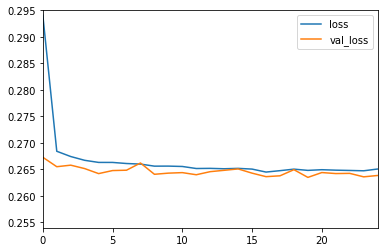

In [464]:
losses[['loss','val_loss']].plot()
plt.xlim(0,24)
plt.ylim(0.254,0.295)

In [465]:
predictions = model.predict(X_test).round()

2471/2471 [==============================] - 4s 1ms/step


In [466]:
predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [467]:
from sklearn.metrics import classification_report, confusion_matrix

In [468]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 6758  8900]
 [   42 63344]]


Creating a random customer

In [469]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [470]:
# predicting outcome
model.predict(new_customer.values.reshape(1,78)).round()

1/1 [==============================] - 0s 40ms/step


array([[1.]], dtype=float32)

Check if this person actually end up paying back its loan

In [471]:
df.iloc[random_ind]['loan_repaid']

1.0